In [126]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import norm
from scipy.linalg import cholesky

## Task 1: Probability

#### A. Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\mathcal{N}(x; 1; 1)$

In [127]:
n = 1000
mu = 1
sigma = np.sqrt(1)
x = np.random.normal(mu, sigma, n)
p_x = norm.pdf(x, mu, sigma)

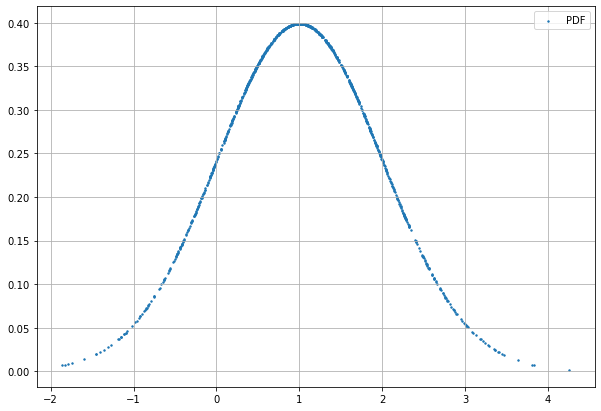

In [128]:
plt.figure(figsize=(10,7))
plt.scatter(x, p_x, label='PDF', s=2)
plt.legend()
plt.grid()

#### B. Calculate the probability mass that the random variable $X$ is less than 0, that is, $Pr\{X <= 0\} = \int^{0}_{-\infty}{p(x)dx}$

In [129]:
cdf = norm.cdf(x, loc=mu, scale=sigma)
p_mass = norm.cdf(0, loc=mu, scale=sigma)
print(f"P(X <= 0) = {p_mass:.4f}")

P(X <= 0) = 0.1587


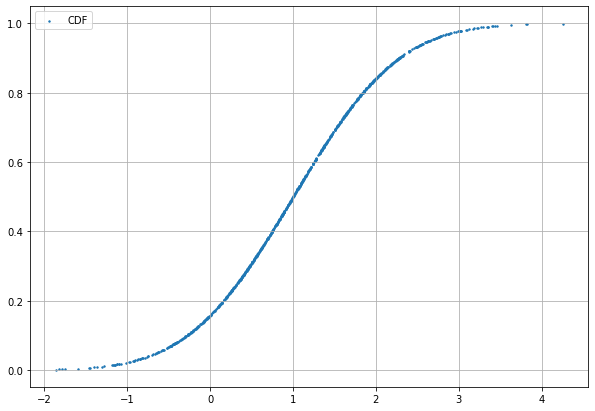

In [130]:
plt.figure(figsize=(10,7))
plt.scatter(x, cdf, label='CDF', s=2)
plt.legend()
plt.grid()

#### C. Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \mathcal{N}(z; x; \sigma^2)$, with variance $\sigma^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.

In [131]:
z = 0.75
sigma_z = np.sqrt(0.2)
# z_x = np.random.normal(z, sigma_z, n)
p_z_x = norm.pdf(z, loc=x, scale=sigma_z)

In [132]:
def p(x: float, mu: float, sigma: float) -> float:
    return np.exp(-0.5 * (x - mu) ** 2 / sigma) / np.sqrt(2 * np.pi * sigma)

In [133]:
p_z = p(x=z, mu=z, sigma=sigma_z)
p_x_z = p_z_x * p_x / p_z

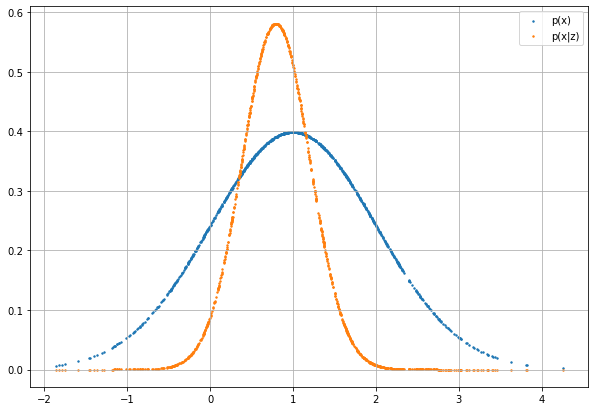

In [134]:
plt.figure(figsize=(10,7))
plt.scatter(x, p_x, label='p(x)', s=2)
plt.scatter(x, p_x_z, label='p(x|z)', s=2)
plt.legend()
plt.grid()

## Task 2: Multivariate Gaussian

#### A. Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc. Then, use plot2dcov to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:

\begin{equation*} \mathcal{N}\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}\bigg) \end{equation*}

\begin{equation*} \mathcal{N}\bigg(\begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 3 & -0.4 \\ -0.4 & 2 \end{bmatrix}\bigg) \end{equation*}

\begin{equation*} \mathcal{N}\bigg(\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix}\bigg) \end{equation*}

#### Use the set_aspect(’equal’) command and comment on them.

In [135]:
def plot2dcov(mean: np.ndarray, cov: np.ndarray, k: List, colors: List = ["r", "g", "b"], new_figure: bool = False, extra_label: str = "", legend: bool = True) -> None:
    L = cholesky(cov, lower=True)
    mean = mean.reshape((mean.size, 1))
    size = 200
    step = 2 * np.pi / size
    points = np.zeros((2, size))
    if new_figure:
        plt.figure(figsize=(10, 10))
    for j in range(k):
        for i in range(size):
            point = np.array([
                [(j + 1) * np.cos(i * step)],
                [(j + 1) * np.sin(i * step)],
            ])
            points[:, i] = (L[:2, :2] @ point + mean[:2]).flatten()
        plt.plot(points[0, :], points[1, :], color=colors[j], label=f"{j + 1}-sigma iso-contour {extra_label}")
    plt.axis('equal')
    if legend:
        plt.legend()
    plt.grid()
    return

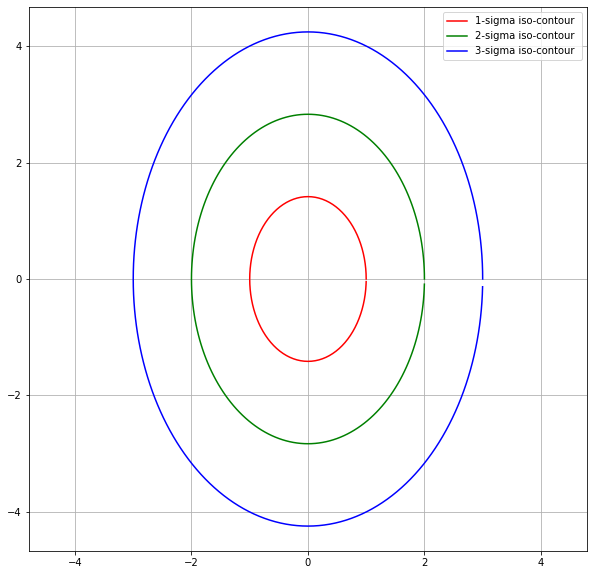

In [136]:
mu = np.array([[0], [0]])
sigma = np.array([
    [1, 0],
    [0, 2]
])
plot2dcov(mu, sigma, 3, new_figure=True)

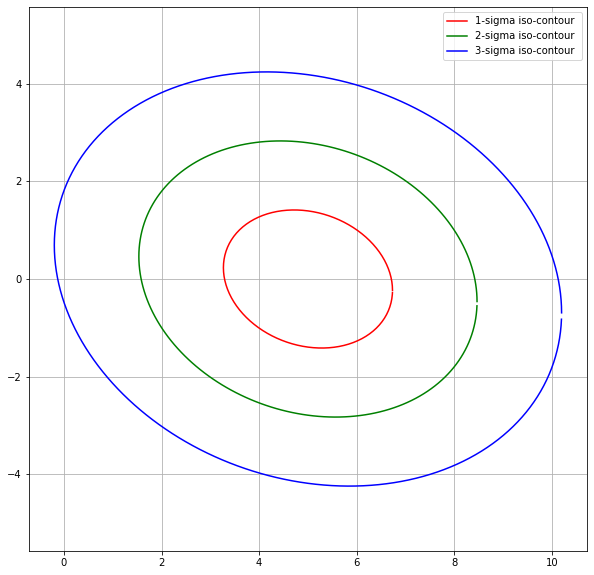

In [137]:
mu = np.array([[5], [0]])
sigma = np.array([
    [3, -0.4],
    [-0.4, 2]
])
plot2dcov(mu, sigma, 3, new_figure=True)

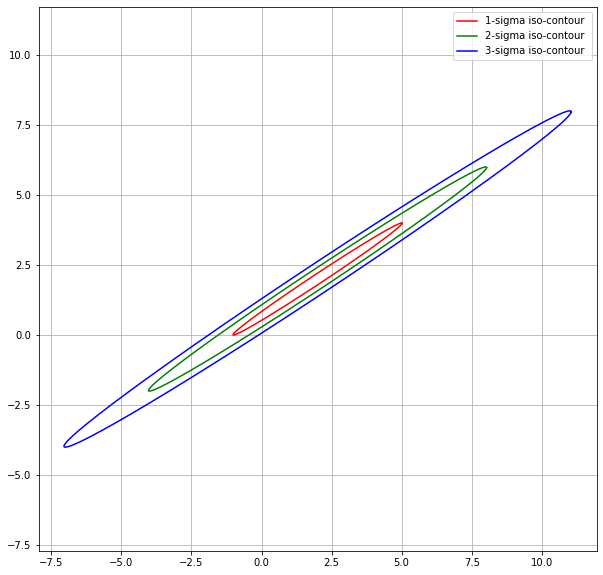

In [138]:
mu = np.array([[2], [2]])
sigma = np.array([
    [9.1, 6],
    [6, 4]
])
plot2dcov(mu, sigma, 3, new_figure=True)

#### B. Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as was shown during the lecture.

##### Sample mean: $\overline x = \frac 1 N \displaystyle\sum_{i=1}^N x_i$

##### Sample covariance: ${\overline {\Sigma}}_x = \frac 1 {N - 1} \displaystyle\sum_{i=1}^N (x_i - \overline x)(x_i - \overline x)^T$

#### C. Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\mathcal{N} (0, 1)$. In particular, draw and plot 200 samples from:

\begin{equation*} \mathcal{N}\bigg(\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 1.3 \\ 1.3 & 3 \end{bmatrix}\bigg) \end{equation*}

#### Also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [139]:
def plot2dcov_with_cloud(cloud: np.ndarray, mean: np.ndarray, cov: np.ndarray, k: List, iso_colors: List = ["red", "green", "darkblue"], cloud_color: str = "black", new_figure: bool = True, legend: bool = True, sample_iso: bool = True) -> None:
    plot2dcov(mean, cov, k, colors=iso_colors, new_figure=new_figure, extra_label="(calculated)", legend=legend)
    if sample_iso:
        cloud_mu = cloud.mean(axis=0)
        cloud_sigma = np.cov(cloud.T)
        with np.printoptions(precision=4, suppress=True):
            print(f"Sample mean:\n {cloud_mu}")
            print(f"Sample covariance:\n {cloud_sigma}")
        plot2dcov(cloud_mu, cloud_sigma, 1, colors=["orange", "lime", "blue"], extra_label="(sample)", legend=legend)
    plt.scatter(cloud[:,0], cloud[:,1], color=cloud_color, label='Sample cloud', s=3)
    plt.axis('equal')
    plt.grid(visible=True)
    return

Sample mean:
 [1.8093 2.1227]
Sample covariance:
 [[0.8278 1.1751]
 [1.1751 3.5523]]


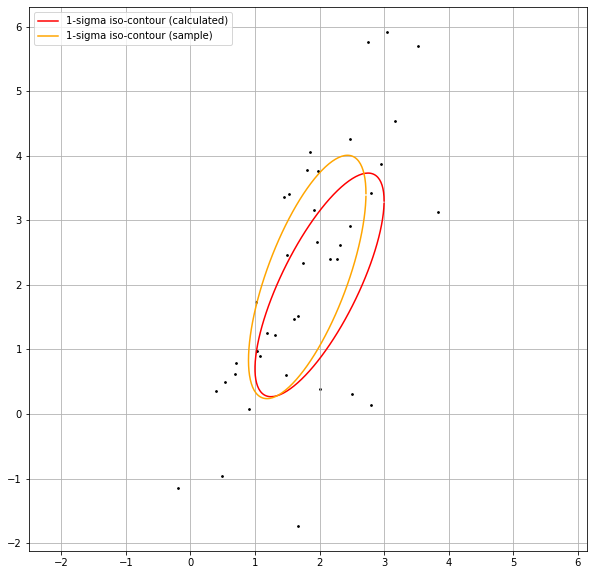

In [140]:
k = 40
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [1.9101 1.7869]
Sample covariance:
 [[0.9454 1.2269]
 [1.2269 2.7304]]


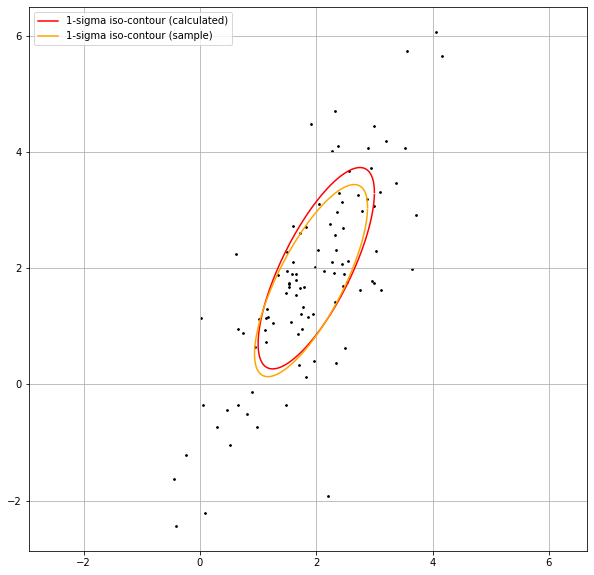

In [141]:
k = 100
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [2.0232 2.1142]
Sample covariance:
 [[0.9014 1.3484]
 [1.3484 3.4568]]


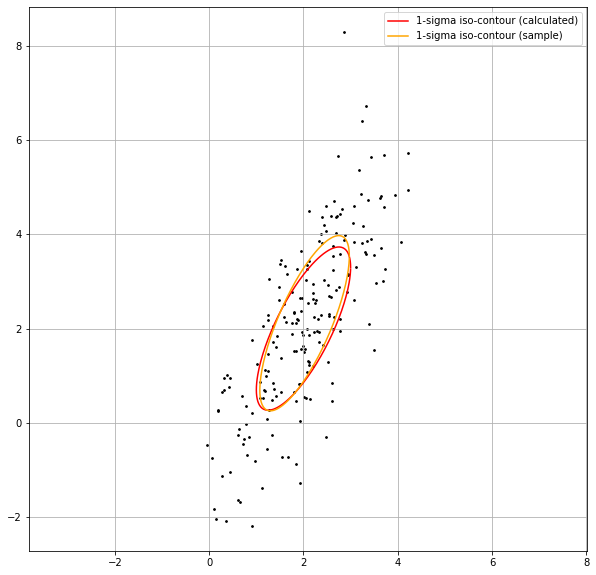

In [142]:
k = 200
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

Sample mean:
 [1.9757 1.9827]
Sample covariance:
 [[1.0302 1.39  ]
 [1.39   3.1095]]


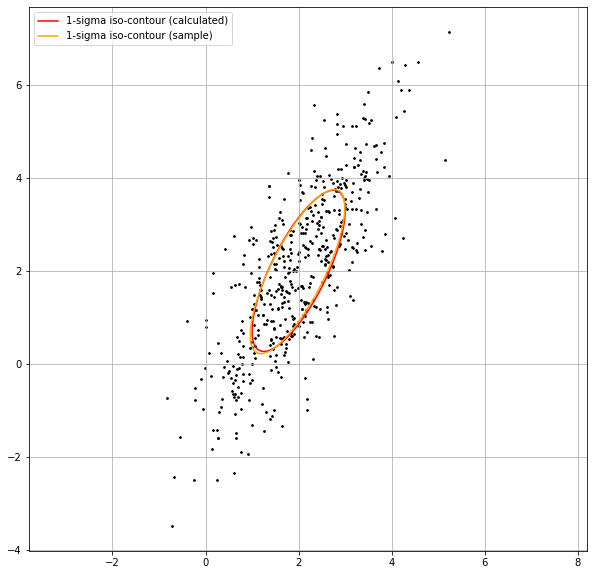

In [143]:
k = 500
calc_mu = np.array([2, 2])
calc_sigma = np.array([
    [1, 1.3],
    [1.3, 3]
])

cloud = np.random.multivariate_normal(calc_mu, calc_sigma, k)
plot2dcov_with_cloud(cloud, calc_mu, calc_sigma, 1)

## Task 3: Covariance Propagation

#### For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free point without restrictions. The propagation model is the following: 

\begin{equation*} {\begin{bmatrix} x \\ y \end{bmatrix}}_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} {\begin{bmatrix} x \\ y \end{bmatrix}}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} {\begin{bmatrix} v_x \\ v_y \end{bmatrix}}_{t-1} + {\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t} \end{equation*}

#### where the controls $u={\begin{bmatrix} v_x & v_y\end{bmatrix}}^T$ are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty on command execution: 

\begin{equation*} {\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t}\thicksim\mathcal{N}\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\bigg) \end{equation*}

#### We will consider a time step of $\Delta t=0.5$.

#### A. Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.

##### Mean after single propagation:

  \begin{equation*} {\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}}_t = {\begin{bmatrix} x + 0.5 v_x \\ y + 0.5 v_y \end{bmatrix}}_{t-1} \end{equation*}

##### Covariance after single propagation:

  \begin{equation*} \Sigma_t = \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix} \end{equation*}

#### B. How can we use this result iteratively?

#### C. Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0...5$ and the control sequence $u_t = [3, 0]^T$  for all times $t$. The PDF for the initial state is:

\begin{equation*} {\begin{bmatrix} x \\ y \end{bmatrix}_0}\thicksim\mathcal{N}\bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\bigg) \end{equation*}

[0 0]
[ 1.5102 -0.0002]
[ 3.0194 -0.0181]
[4.5468 0.0086]
[6.031  0.0122]
[7.5132 0.0239]
[8.9969 0.0081]
[10.5033  0.0451]
[11.9827  0.0548]
[13.4788  0.0492]


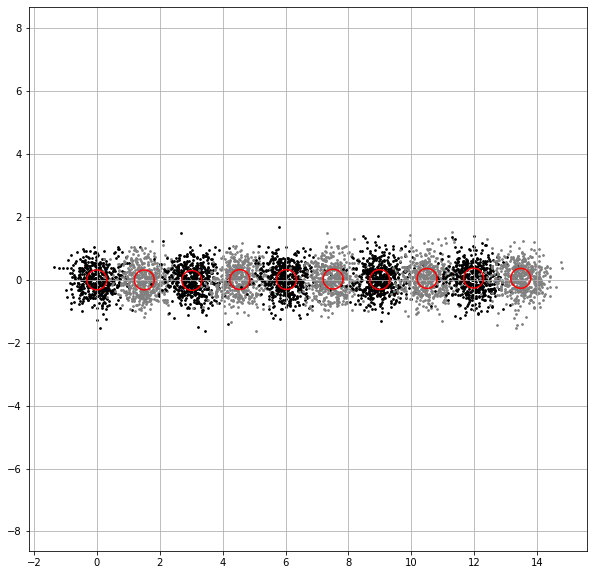

In [144]:
dt = 0.5
u = np.array([3, 0])
A = np.array([
    [1, 0],
    [0, 1]
])
mu = np.array([0, 0])
cov = np.array([
    [0.1, 0],
    [0, 0.1]
])
n_mu = np.array([0, 0])
n_cov = np.array([
    [0.1, 0],
    [0, 0.1]
])
k = 500
new_figure = True
cloud_colors = ["black", "gray"]
for i in range(10):
    with np.printoptions(precision=4, suppress=True):
        print(mu)  
    cloud = np.random.multivariate_normal(mu, cov, k)
    noise_cloud = np.random.multivariate_normal(n_mu, n_cov, k)
    cloud += noise_cloud
    plot2dcov_with_cloud(cloud, mu, cov, 1, new_figure=new_figure, legend=False, sample_iso=False, cloud_color=cloud_colors[i % 2])
    cloud_mu = cloud.mean(axis=0)
    mu = A @ cloud_mu + u * dt
    new_figure = False

#### D. Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed: 

\begin{equation*} {\begin{bmatrix} x \\ y \end{bmatrix}}_t = \begin{bmatrix} 1 & 0.3 \\ 0 & 1 \end{bmatrix} {\begin{bmatrix} x \\ y \end{bmatrix}}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} {\begin{bmatrix} v_x \\ v_y \end{bmatrix}}_{t-1} + {\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t} \end{equation*}

#### All the other parameters and controls are the same as defined earlier. Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes $t = 0...5$

[0 0]
[1.4874 0.0218]
[3.0015 0.0435]
[4.5148 0.0489]
[5.9868 0.0596]
[7.5051 0.0794]
[9.0421 0.0957]
[10.6148  0.1634]
[12.2001  0.1516]
[13.736   0.1556]


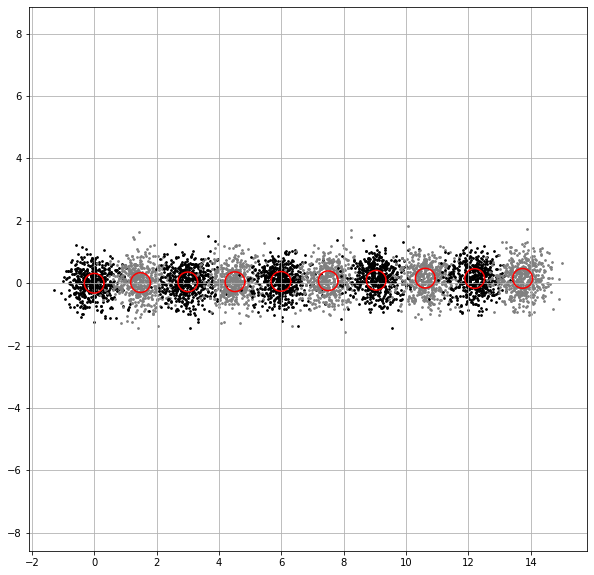

In [145]:
A = np.array([
    [1, 0.3],
    [0, 1]
])
mu = np.array([0, 0])
new_figure = True
for i in range(10):
    with np.printoptions(precision=4, suppress=True):
        print(mu)  
    cloud = np.random.multivariate_normal(mu, cov, k)
    noise_cloud = np.random.multivariate_normal(n_mu, n_cov, k)
    cloud += noise_cloud
    plot2dcov_with_cloud(cloud, mu, cov, 1, new_figure=new_figure, legend=False, sample_iso=False, cloud_color=cloud_colors[i % 2])
    cloud_mu = cloud.mean(axis=0)
    mu = A @ cloud_mu + u * dt
    new_figure = False

#### E. Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model is:

\begin{equation*} {\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}}_t = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} {\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}}_{t-1} + \begin{bmatrix} cos(\theta ) \Delta t & 0 \\ sin(\theta ) \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} {\begin{bmatrix} v \\ \omega \end{bmatrix}}_{t-1} + {\begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta }\end{bmatrix}_t} \end{equation*}

#### and the PDF for the initial state

\begin{equation*} {\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_0}\thicksim\mathcal{N}\bigg(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix}\bigg) \end{equation*}

#### Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the control $u_t = [3, 1.5]^T$ showing the propagated Gaussian by plotting the 1-sigma iso-contour. Angles are in radians. Hint: you can marginalize out $\theta$ and plot the corresponding $\Sigma (xy)$ as explained in class

[0 0 0]
[2.962  0.0348 2.5672]
[0.5063 1.6764 5.0557]
[ 1.4982 -1.1363  7.582 ]
[ 2.2815  1.7481 10.1023]


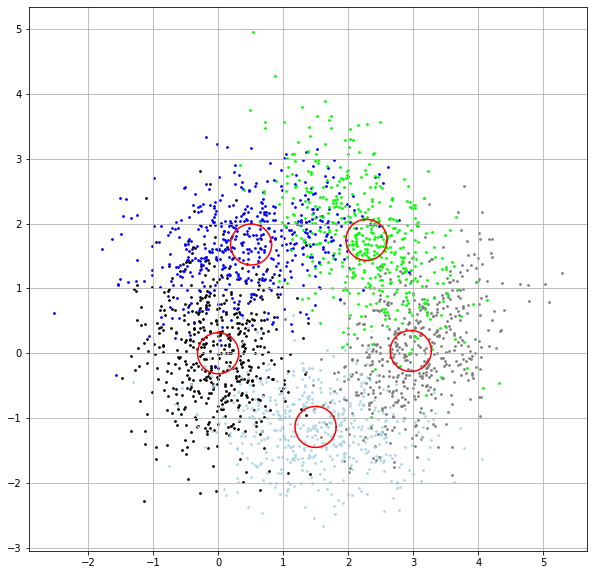

In [146]:
dt = 1
u = np.array([3, 1.5])
A = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
mu = np.array([0, 0, 0])
cov = np.array([
    [0.1, 0, 0],
    [0, 0.1, 0],
    [0, 0, 0.5]
])
n_mu = np.array([0, 0, 0])
n_cov = np.array([
    [0.2, 0, 0],
    [0, 0.2, 0],
    [0, 0, 0.1]
])
k = 500
new_figure = True
cloud_colors = ["black", "gray", "blue", "lightblue", "lime"]
for i in range(5):
    with np.printoptions(precision=4, suppress=True):
        print(mu)  
    cloud = np.random.multivariate_normal(mu, cov, k)
    der = np.array([
        [-np.sin(mu[2]), 0],
        [np.cos(mu[2]), 0],
        [0, 1]
    ])
    diff = np.concatenate(((cloud[:, 2] - mu[2]), (np.ones(k) * dt)), axis=0).reshape(2, k)
    lin_cloud = (der @ diff).T
    noise_cloud = np.random.multivariate_normal(n_mu, n_cov, k)
    cloud += lin_cloud + noise_cloud
    plot2dcov_with_cloud(cloud, mu, cov, 1, new_figure=new_figure, legend=False, sample_iso=False, cloud_color=cloud_colors[i % 5])
    cloud_mu = cloud.mean(axis=0)
    B = np.array([
        [np.cos(mu[2]), 0],
        [np.sin(mu[2]), 0],
        [0, 1]
    ]) * dt
    mu = A @ cloud_mu + B @ u
    new_figure = False